# 2A.ml - Statistiques descriptives avec scikit-learn

[ACP](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales), [CAH](https://en.wikipedia.org/wiki/Hierarchical_clustering), [régression lineaire](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire).

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Introduction

Les statistiques descriptives sont abordées de la première année à l'ENSAE. Un des livres que je consulte souvent est celui de Gilles Saporta : [Probabilités, analyse des données et statistique](http://www.editionstechnip.com/fr/catalogue-detail/149/probabilites-analyse-des-donnees-et-statistique.html) qui est en français.

Le module [scikit-learn](http://scikit-learn.org/stable/) a largement contribué au succès de Python dans le domaine du [machine learning](http://en.wikipedia.org/wiki/Machine_learning). Ce module inclut de nombreuses techniques regroupées sous le terme statistiques descriptives. La correspondance anglais-français n'est pas toujours évidente. Voici quelques termes :

* [ACP](http://fr.wikipedia.org/wiki/ACP) - [PCA](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [k-moyennes](http://fr.wikipedia.org/wiki/Algorithme_des_k-moyennes) - [k-means](http://scikit-learn.org/stable/modules/clustering.html#k-means)
* [CAH](http://en.wikipedia.org/wiki/CAH) - [Hierarchical Clustering](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
* [k plus proches voisins](http://fr.wikipedia.org/wiki/Recherche_des_plus_proches_voisins) - [k-PPV](http://scikit-learn.org/stable/modules/neighbors.html)
* [analyse linéaire discriminante](http://fr.wikipedia.org/wiki/Analyse_discriminante_lin%C3%A9aire) - [LDA](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.lda)
* [régression linéaire](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) - [linear regression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)


[scikit-learn](http://scikit-learn.org/stable/) est orienté machine learning, les résultats qu'il produit sont un peu moins complets que [statsmodels](http://statsmodels.sourceforge.net/) pour les modèles statistiques linéaires ou [fastcluster](http://cran.r-project.org/web/packages/fastcluster/vignettes/fastcluster.pdf) pour la CAH. L'objectif de ces deux heures est d'utiliser ces modules pour étudier un jeu de données :

### ACP (Analyse en Composantes Principales)

Le site [data.gouv.fr](https://www.data.gouv.fr/) propose de nombreux jeux de données dont [Séries chronologiques Education : les élèves du second degré](https://www.data.gouv.fr/fr/datasets/series-chronologiques-education-les-eleves-du-second-degre/). Ces données sont également accessibles comme ceci :

In [5]:
import pandas, numpy, pyensae
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fichier = pyensae.download_data("eleve_region.txt")
df = pandas.read_csv("eleve_region.txt", sep="\t", encoding="utf8", index_col=0)
print(df.shape)
df.head(n=5)

(27, 21)


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
académie,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,241357,242298,242096,242295,243660,244608,245536,247288,249331,250871,...,250622,248208,245755,243832,242309,240664,240432,241336,239051,240115
Amiens,198281,196871,195709,194055,192893,191862,189636,185977,183357,180973,...,175610,172110,168718,165295,163116,162548,163270,164422,165275,166345
Besançon,116373,115600,114282,113312,112076,110261,108106,105463,103336,102264,...,100117,98611,97038,95779,95074,94501,94599,94745,94351,94613
Bordeaux,253551,252644,249658,247708,247499,245757,244992,243047,243592,245198,...,244805,244343,242602,242933,243146,244336,246806,250626,252085,255761
Caen,145435,144369,141883,140658,139585,137704,135613,133255,131206,129271,...,125552,123889,122550,121002,119857,119426,119184,119764,119010,119238


Pour visualiser les données, on peut utiliser le module [qgrid](https://github.com/quantopian/qgrid). Ce module fonctionne mieux sous Chrome mais pas très bien en général.

In [7]:
import qgrid
qgrid.nbinstall(overwrite=True)

In [8]:
qgrid.show_grid(df[df.columns[-10:]])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Il y a aussi le module [pivottablejs](https://pypi.python.org/pypi/pivottablejs) qui fait beaucoup de choses sauf l'essentiel.

In [9]:
import pivottablejs

In [10]:
pivottablejs.pivot_ui(df[df.columns[-10:]], height=200)

On veut observer l'évolution du nombre d'élèves. On prend l'année 1993 comme base 100.

In [12]:
for c in df.columns:
    if c != "1993":
        df[c] /= df ["1993"]
df["1993"] /= df["1993"]
df.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
académie,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,1.0,1.003899,1.003062,1.003886,1.009542,1.013470,1.017315,1.024574,1.033038,1.039419,...,1.038387,1.028385,1.018222,1.010255,1.003944,0.997129,0.996168,0.999913,0.990446,0.994854
Amiens,1.0,0.992889,0.987029,0.978687,0.972826,0.967627,0.956400,0.937947,0.924733,0.912710,...,0.885662,0.868011,0.850904,0.833640,0.822651,0.819786,0.823427,0.829237,0.833539,0.838936
Besançon,1.0,0.993358,0.982032,0.973697,0.963076,0.947479,0.928961,0.906250,0.887972,0.878761,...,0.860311,0.847370,0.833853,0.823035,0.816976,0.812053,0.812895,0.814149,0.810764,0.813015
Bordeaux,1.0,0.996423,0.984646,0.976955,0.976131,0.969261,0.966243,0.958572,0.960722,0.967056,...,0.965506,0.963684,0.956817,0.958123,0.958963,0.963656,0.973398,0.988464,0.994218,1.008716
Caen,1.0,0.992670,0.975577,0.967154,0.959776,0.946842,0.932465,0.916251,0.902162,0.888858,...,0.863286,0.851851,0.842644,0.832001,0.824128,0.821164,0.819500,0.823488,0.818304,0.819871


Il n'est pas évident d'analyser ce tableaux de chiffres. On utilise une ACP pour projeter les académies dans un plan.

In [14]:
pca = PCA(n_components=4)
print(pca.fit(df))
pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([  9.63024476e-01,   3.37267932e-02,   1.93116666e-03,
         6.61046399e-04])

Le premier axe explique l'essentiel de la variance. Les variables n'ont pas été normalisées car elles évoluent dans les mêmes ordres de grandeur.

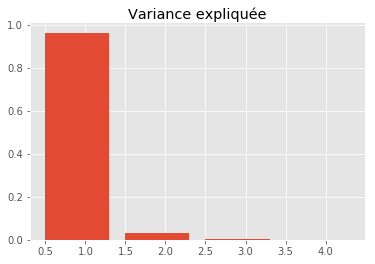

In [16]:
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

On affiche les académies dans le plan des deux premiers axes :

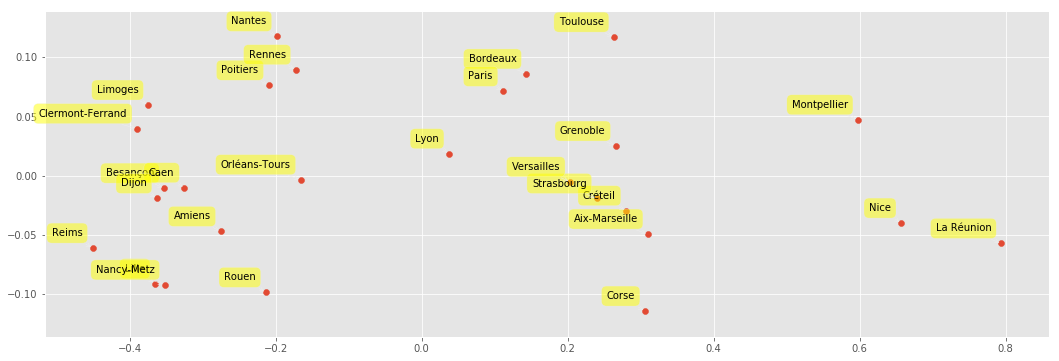

In [18]:
X_reduced = pca.transform(df)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

for label, x, y in zip(df.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Puis on vérifie que deux villes proches ont le même profil d'évolution au cours des années :

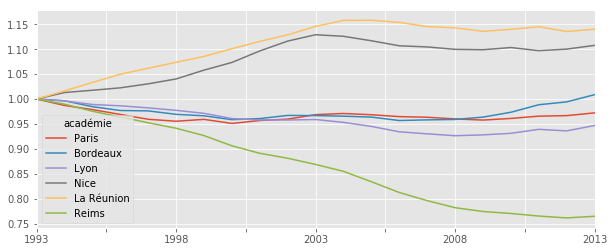

In [19]:
sub = df.loc[["Paris","Bordeaux", "Lyon", "Nice", "La Réunion", "Reims"],:]
sub.transpose().plot(figsize =(10,4))

L'[ACP version statsmodels](http://statsmodels.sourceforge.net/devel/generated/statsmodels.sandbox.tools.tools_pca.pca.html) produit le même type de résultats. Un exemple est disponible ici : [PCA and Biplot using Python](http://okomestudio.net/biboroku/?p=2292).

### Exercice 1 : CAH (classification ascendante hiérarchique)

Le point commun de ces méthodes est qu'elles ne sont pas supervisées. L'objectif est de réduire la complexité des données. Réduire le nombre de dimensions pour l'ACP ou segmenter les observations pour les k-means et la CAH. On propose d'utiliser une CAH sur les mêmes données.

#### version scikit-learn

Le module [scikit-learn.cluster](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) ne propose pas de fonction pour dessiner le [dendrogram](http://en.wikipedia.org/wiki/Dendrogram). Il faudra utiliser celle-ci : [dendrogram](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) et sans doute s'inspirer du code suivant.

In [21]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
dendro = [ ]
for a,b in ward.children_:
    dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

#### version fastcluster

Pour cela, il faut s'inspirer de l'exemple [Comparison of Python packages for hierarchical clustering](http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb) ou [Hierarchical clustering](http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week3/hierarchical_clustering.ipynb) si le module ``fastcluster`` n'est pas installé.

### Exercice 2 : régression

Ce sont trois méthodes supervisées : on s'en sert pour expliquer prédire le lien entre deux variables $X$ et $Y$ (ou ensemble de variables) ou prédire $Y$ en fonction de $X$. Pour cet exercice, on récupère des données relatives aux salaires [Salaires et revenus d'activités](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-dads2010&page=fichiers_detail/dads2010/description.htm). La récupération des données est assez fastidieuse. La première étape consiste à télécharger les données depuis le site de l'[INSEE](http://www.insee.fr/). La seconde étape consiste à convertir les données au format [sqlite3](https://docs.python.org/3.4/library/sqlite3.html). Pour ce fichier, ce travail a déjà été effectué et peut être téléchargé depuis mon site. La base comprend 2 millions de lignes.

In [23]:
import pyensae
f = pyensae.download_data("dads2010_gf_salaries10_dbase.zip",
                          website="http://telechargement.insee.fr/fichiersdetail/dads2010/dbase/")
f

['varmod_salarie.dbf',
 'lisezmoi_salaries10.txt',
 'salaries10.DBF',
 'varlist_salarié.dbf']

In [25]:
import pandas
try:
    from dbfread import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False
    
if use_dbfread:
    import os
    for name in os.listdir("."):
        if name == "salaries2010.db3":
            os.remove(name)
    print("convert dbase into sqllite")
    from pyensae.datasource import dBase2sqllite  # fonction ajoutée 10/2014
    dBase2sqllite("salaries2010.db3", "varlist_salarié.dbf", overwrite_table="varlist")
    dBase2sqllite("salaries2010.db3", "varmod_salarie.dbf", overwrite_table="varmod")
    dBase2sqllite("salaries2010.db3", 'salaries10.dbf', overwrite_table="salaries", fLOG = print)
else :
    print("use of zipped version")
    import pyensae
    db3 = pyensae.download_data("salaries2010.zip")
    # pour aller plus vite, donnée à télécharger au
    # http://www.xavierdupre.fr/enseignement/complements/salaries2010.zip

convert dbase into sqllite
SQL  'drop table if exists salaries10'
SQL  'create table salaries (A6 TEXT, A17 TEXT, A38 TEXT, REGR TEXT, DEPR TEXT, REGT TEXT, DEPT TEXT, SEXE TEXT, PCS TEXT, CONT_TRAV TEXT, CONV_COLL TEXT, TYP_EMPLOI TEXT, DUREE REAL, DATDEB REAL, DATFIN REAL, CPFD TEXT, DOMEMPL TEXT, DOMEMPL_EM TEXT, FILT TEXT, AGE REAL, CS TEXT, NB_PER REAL, NB_PER_N REAL, NBHEUR REAL, NBHEUR_TOT REAL, TRALCHT TEXT, TREFF TEXT, TRNETTOT TEXT, POND REAL)'
moving line  0  to table salaries
moving line  20000  to table salaries
moving line  40000  to table salaries
moving line  60000  to table salaries
moving line  80000  to table salaries
moving line  100000  to table salaries
moving line  120000  to table salaries
moving line  140000  to table salaries
moving line  160000  to table salaries
moving line  180000  to table salaries
moving line  200000  to table salaries
moving line  220000  to table salaries
moving line  240000  to table salaries
moving line  260000  to table salaries
movi

Les données des salaires ne sont pas numériques, elles correspondent à des intervalles qu'on convertit en prenant le milieu de l'intervalle. Pour le dernier, on prend la borne supérieure.

In [26]:
import sqlite3, pandas
con = sqlite3.connect("salaries2010.db3")
df = pandas.io.sql.read_sql("select * from varmod", con)
con.close()

values = df[ df.VARIABLE == "TRNETTOT"].copy()

def process_intervalle(s):
    if "euros et plus" in s : 
        return float ( s.replace("euros et plus", "").replace(" ","") )
    spl = s.split("à")
    if len(spl) == 2 : 
        s1 = spl[0].replace("Moins de","").replace("euros","").replace(" ","")
        s2 = spl[1].replace("Moins de","").replace("euros","").replace(" ","")
        return (float(s1)+float(s2))/2
    else : 
        s = spl[0].replace("Moins de","").replace("euros","").replace(" ","")
        return float(s)/2

values["montant"] = values.apply(lambda r : process_intervalle(r ["MODLIBELLE"]), axis = 1)
values.head()

,VARIABLE,MODALITE,MODLIBELLE,montant
1726,TRNETTOT,00,Moins de 200 euros,100.0
1727,TRNETTOT,01,200 à 499 euros,349.5
1728,TRNETTOT,02,500 à 999 euros,749.5
1729,TRNETTOT,03,1 000 à 1 499 euros,1249.5
1730,TRNETTOT,04,1 500 à 1 999 euros,1749.5


On crée la base d'apprentissage :

In [28]:
import sqlite3, pandas
con = sqlite3.connect("salaries2010.db3")
data = pandas.io.sql.read_sql("select TRNETTOT,AGE,SEXE from salaries", con)
con.close()

salaires = data.merge ( values, left_on = "TRNETTOT", right_on="MODALITE" )
salaires.head()

,TRNETTOT,AGE,SEXE,VARIABLE,MODALITE,MODLIBELLE,montant
0,14,50.0,1,TRNETTOT,14,18 000 à 19 999 euros,18999.5
1,14,41.0,1,TRNETTOT,14,18 000 à 19 999 euros,18999.5
2,14,29.0,1,TRNETTOT,14,18 000 à 19 999 euros,18999.5
3,14,30.0,1,TRNETTOT,14,18 000 à 19 999 euros,18999.5
4,14,55.0,1,TRNETTOT,14,18 000 à 19 999 euros,18999.5


On récupère les variables utiles pour la régression :

In [30]:
salaires["M"] = salaires.apply( lambda r : 1 if r["SEXE"] == "1" else 0, axis=1)
salaires["F"] = salaires.apply( lambda r : 1 if r["SEXE"] == "2" else 0, axis=1)
data = salaires[["AGE","M","F","montant"]]
data = data [data.M + data.F > 0]
data.head()

,AGE,M,F,montant
0,50.0,1,0,18999.5
1,41.0,1,0,18999.5
2,29.0,1,0,18999.5
3,30.0,1,0,18999.5
4,55.0,1,0,18999.5


Il ne reste plus qu'à faire la régression.

#### version scikit-learn

Vous pouvez vous inspirer de cet [exemple](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).

#### version statsmodels

L'exemple avec ce module est [ici](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html).